## IE 5374: Foundations of Data Analytics
## Project 2
## Group Members:
## 1) Neeraj Rangwani
## 2) Niral Desai
## 3) Deekshitha Prakash

# TASK 1

In [1]:
#Library for building visibility graphs for the time series data
#!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.0 MB/s 


In [2]:
#For 2D vector graphics
#!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.1 MB/s 


In [3]:
#For printing Tabular data
#!pip install tabulate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Mounting the google drive on the colab
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Importing the necessary libraries required for the project
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
from tabulate import tabulate

In [11]:
#Path of the google drive where data is stored
path = '/content/drive/MyDrive/project2/'

In [12]:
#Function for Natural Visibility Graph
def naturalVisibilityGraph(data,axis,graph,subjno,activity):
  g = NaturalVG()
  g.build(data)
  ig_g = g.as_igraph()
  return ig_g

In [13]:
#Function for Horiattr_zontal Visibility Graph
def horizontalVisibilityGraph(data,axis,graph,subjno,activity):
  g = HorizontalVG()
  g.build(data)
  ig_g = g.as_igraph()
  return ig_g

In [14]:
activities = ['running', 'climbingdown', 'climbingup', 'walking']  #Specifying all the activities in the dataset
results = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer axis', 'Average degree', 'Network diameter', 'Average path length', 'Activity']) #columns required in the dataframe
accelerometer_axis = ['attr_x', 'attr_y', 'attr_z']   #attr_x, y, attr_z aattr_xis
visibility_graphs = ['NVG', 'HVG']

In [15]:
for activity in activities:
  for subjno in range(1,16):
    filepath = path+'Subject-'+str(subjno)+'/acc_'+activity+'_csv'
    for filename in os.listdir(filepath):     #Fetching the data from the file directory
      df = pd.read_csv(filepath+'/'+filename) #Reading the csv file from the directory
      body_part = str(filename).rstrip('.csv').split('_')[-1]
      for axis in accelerometer_axis:
        for graph in visibility_graphs:
          if graph == 'NVG':   #If graph is NVG, plot NVG graph using function
            ig_g = naturalVisibilityGraph(df[axis][1000:2024],axis,graph,subjno,activity)
            results = results.append({'Method':graph, 'Subject':subjno, 'Accelerometer axis':axis, 'Average degree':np.mean(ig_g.degree()), 'Network diameter':ig_g.diameter(), 'Average path length':ig_g.average_path_length(),'body_part': body_part, 'Activity':activity}, ignore_index=True)
          if graph == 'HVG':   #If graph is HVG, plot HVG graph using function
            ig_g = horizontalVisibilityGraph(df[axis][1000:2024],axis,graph,subjno,activity)
            #Appending the results to the dataframe
            results = results.append({'Method':graph, 'Subject':subjno, 'Accelerometer axis':axis, 'Average degree':np.mean(ig_g.degree()), 'Network diameter':ig_g.diameter(), 'Average path length':ig_g.average_path_length(),'body_part': body_part, 'Activity':activity}, ignore_index=True)

In [16]:
#Dataframe for head and chest
results = results[(results['body_part']=='head') | (results['body_part']=='chest')]
results

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity,body_part
18,NVG,1,attr_x,8.414062,9,4.307645,running,chest
19,HVG,1,attr_x,3.962891,22,7.543843,running,chest
20,NVG,1,attr_y,11.136719,82,28.651949,running,chest
21,HVG,1,attr_y,3.835938,90,31.634922,running,chest
22,NVG,1,attr_z,8.318359,11,4.644369,running,chest
...,...,...,...,...,...,...,...,...
2479,HVG,15,attr_x,3.935547,34,13.545222,walking,chest
2480,NVG,15,attr_y,13.031250,12,4.654480,walking,chest
2481,HVG,15,attr_y,3.958984,31,12.383202,walking,chest
2482,NVG,15,attr_z,9.318359,12,4.945985,walking,chest


In [17]:
#4) Tabulating the results
print(tabulate(results, headers=results.columns, tablefmt='pretty', showindex=False))

+--------+---------+--------------------+----------------+------------------+---------------------+--------------+-----------+
| Method | Subject | Accelerometer axis | Average degree | Network diameter | Average path length |   Activity   | body_part |
+--------+---------+--------------------+----------------+------------------+---------------------+--------------+-----------+
|  NVG   |    1    |       attr_x       |   8.4140625    |        9         | 4.3076448710899315  |   running    |   chest   |
|  HVG   |    1    |       attr_x       |  3.962890625   |        22        |  7.543843169599218  |   running    |   chest   |
|  NVG   |    1    |       attr_y       |  11.13671875   |        82        |  28.65194854288856  |   running    |   chest   |
|  HVG   |    1    |       attr_y       |   3.8359375    |        90        | 31.634922180474096  |   running    |   chest   |
|  NVG   |    1    |       attr_z       |  8.318359375   |        11        |  4.644368966886608  |   running  

5) Generate  scatter plots: average degree vs network diameter and color the points
according to walking and running (do this for each accelerometer signal and
each method (HVH and NVG))

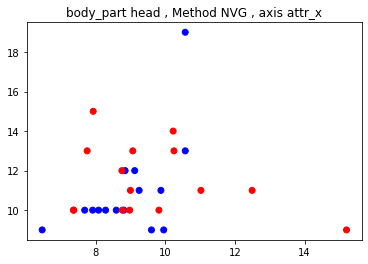

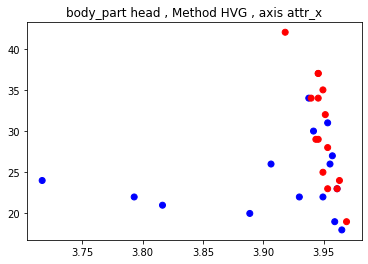

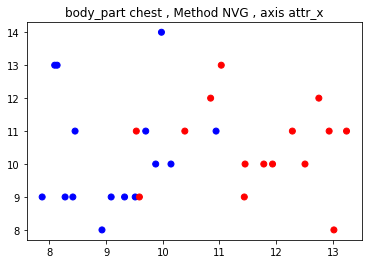

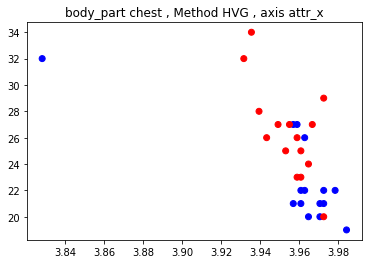

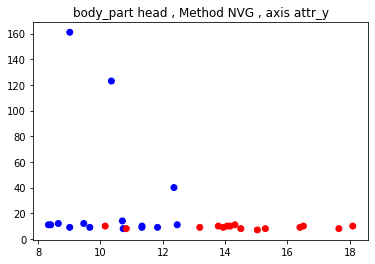

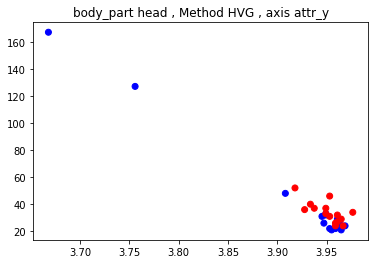

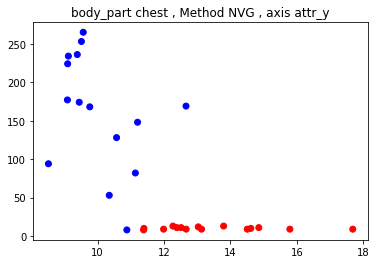

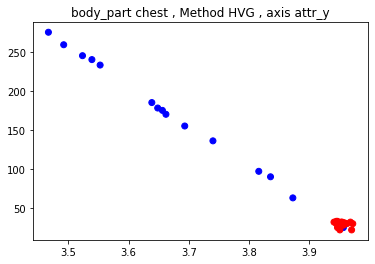

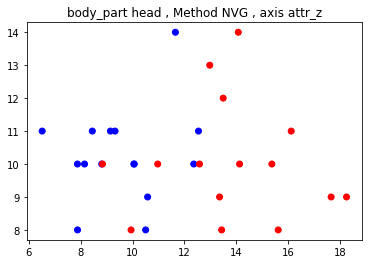

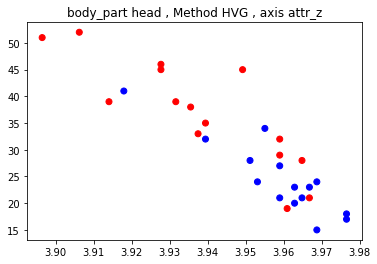

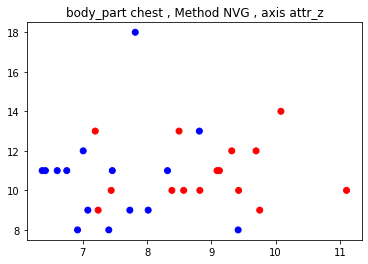

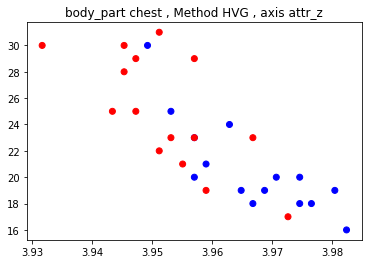

In [18]:
#Scatter Plot for walking and running activities
axis = ['attr_x', 'attr_y', 'attr_z']
methods = ["NVG", "HVG"]
activities = ["walking", "running"]
colors = dict(zip(activities, ["red", "blue"])) #using zip function to map colors to respective activities



for i in range(len(axis)):
  for body_part in ['head', 'chest']:
    for method in range(len(methods)):
      temp = results[((results["Activity"] == "walking") | 
                     (results["Activity"] == "running")) & 
                    (results["Method"] == methods[method]) & 
                    (results["Accelerometer axis"] == axis[i]) & 
                     (results["body_part"] == body_part )]
      plt.scatter(x=temp["Average degree"],   #Scatter Plot between Average degree and Network diameter with hue = Activity
                          y=temp["Network diameter"], 
                          c=temp["Activity"].map(colors))
      plt.title("body_part "+str( body_part)+ ' , Method ' + str(methods[method]) +' , axis '+  axis[i])
      plt.show()


6) Generate  scatter plots: average degree vs network diameter and color the points
according to climbing up and climbing down (do this for each accelerometer
signal and each method (HVH and NVG))

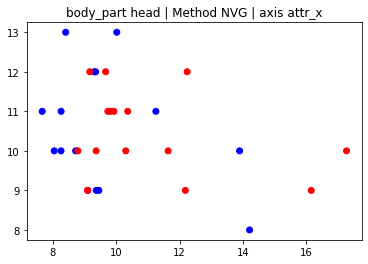

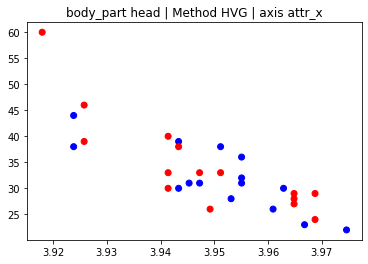

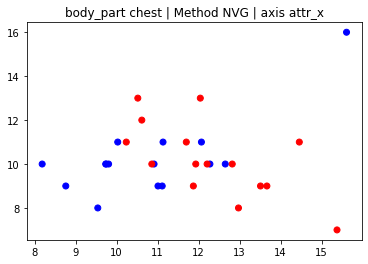

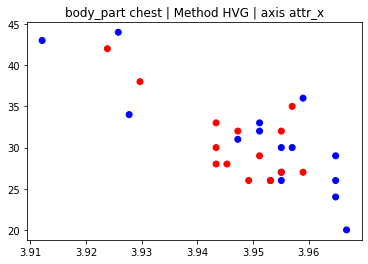

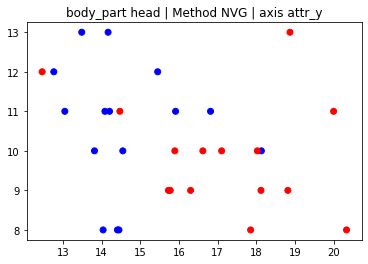

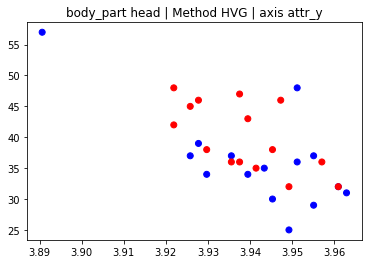

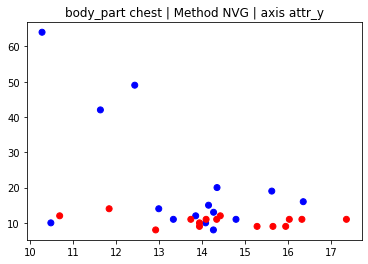

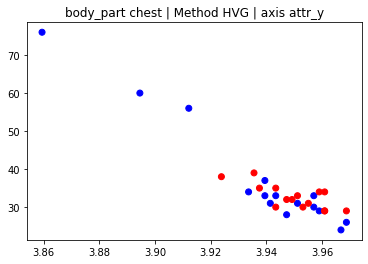

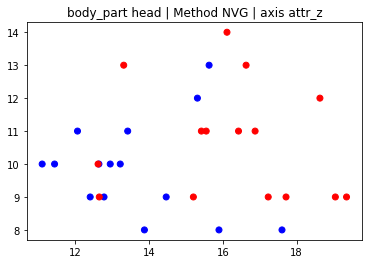

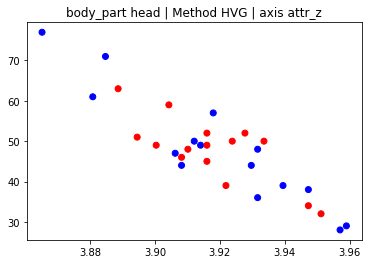

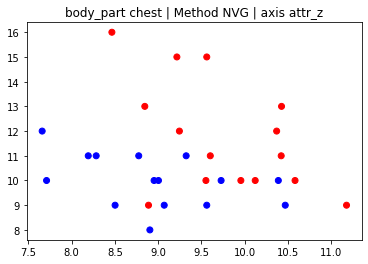

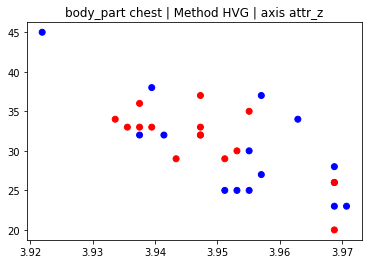

In [19]:
#Scatter plot for climbing up and climbing down activities
axis = ['attr_x', 'attr_y', 'attr_z']
methods = ["NVG", "HVG"]
activities = ["climbingup", "climbingdown"]
colors = dict(zip(activities, ["red", "blue"])) #Mapping the colors using attr_zip
for i in range(len(axis)):
  for body_part in ['head', 'chest']:
    for method in range(len(methods)):
      temp = results[((results["Activity"] == "climbingup") | 
                     (results["Activity"] == "climbingdown")) & 
                    (results["Method"] == methods[method]) & 
                    (results["Accelerometer axis"] == axis[i]) & 
                     (results["body_part"] == body_part )]
      plt.scatter(x=temp["Average degree"],    #Scatter Plot between Average degree and Network diameter with hue = Activity
                          y=temp["Network diameter"], 
                          c=temp["Activity"].map(colors))
      plt.title("body_part "+str( body_part)+ ' | Method ' + str(methods[method]) +' | axis '+  axis[i])
      plt.show()

##TASK 2

In [20]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [21]:
#Fetching the data from the directory
activities = ['running', 'climbingdown', 'climbingup', 'walking']
results2= pd.DataFrame(columns=['Subject', 'Accelerometeraxis', 'Signallength','Dimension','Delay', 'Permutation entropy','Complexity','Body_part','Activity'])
accelerometer_axis = ['attr_x', 'attr_y', 'attr_z']
for activity in activities:
  for subjno in range(1,len(os.listdir(path))+1):
    filepath = path+'Subject-'+str(subjno)+'/acc_'+activity+'_csv'
    for filename in os.listdir(filepath):
      df = pd.read_csv(filepath+'/'+filename)
      body_part = str(filename).rstrip('.csv').split('_')[-1]
      for axis in accelerometer_axis:
        for delay in [1,2,3]:
          for dimension in [3,4,5,6]:
            for length in [1024, 2048, 4096]:
              op = ordinal_patterns(df[axis][0:length],dimension,delay)
              npe = p_entropy(op)
              ncomp = complexity(op)
              results2 = results2.append({'Subject': subjno, 'Accelerometeraxis':axis, 'Signallength':length,'Dimension':dimension,'Delay':delay, 'Permutation entropy': npe,'Complexity':ncomp,'Body_part':body_part,'Activity':activity}, ignore_index=True)


In [22]:
#Printing the dataframe for head and chest
results2 = results2[(results2['Body_part']=='head') | (results2['Body_part']=='chest')]
results2

,Subject,Accelerometeraxis,Signallength,Dimension,Delay,Permutation entropy,Complexity,Body_part,Activity
324,1,attr_x,1024,3,1,0.905463,0.082471,chest,running
325,1,attr_x,2048,3,1,0.902323,0.084937,chest,running
326,1,attr_x,4096,3,1,0.896041,0.089835,chest,running
327,1,attr_x,1024,4,1,0.861138,0.149845,chest,running
328,1,attr_x,2048,4,1,0.856955,0.155959,chest,running
...,...,...,...,...,...,...,...,...,...
44707,15,attr_z,2048,5,3,0.949681,0.086468,chest,walking
44708,15,attr_z,4096,5,3,0.924235,0.125097,chest,walking
44709,15,attr_z,1024,6,3,0.956943,0.082305,chest,walking
44710,15,attr_z,2048,6,3,0.937889,0.122555,chest,walking


In [25]:
#4) Tabulating the results
print(tabulate(results2, headers=results2.columns, tablefmt='pretty', showindex=False))

+---------+-------------------+--------------+-----------+-------+---------------------+------------------------+-----------+--------------+
| Subject | Accelerometeraxis | Signallength | Dimension | Delay | Permutation entropy |       Complexity       | Body_part |   Activity   |
+---------+-------------------+--------------+-----------+-------+---------------------+------------------------+-----------+--------------+
|    1    |      attr_x       |     1024     |     3     |   1   | 0.9054625360541366  |  0.08247060485779005   |   chest   |   running    |
|    1    |      attr_x       |     2048     |     3     |   1   | 0.9023232130384385  |   0.0849366766367692   |   chest   |   running    |
|    1    |      attr_x       |     4096     |     3     |   1   | 0.8960406450487436  |  0.08983452026033757   |   chest   |   running    |
|    1    |      attr_x       |     1024     |     4     |   1   | 0.8611376463977254  |   0.1498453034054864   |   chest   |   running    |
|    1    |  

3) Generate scatter plots:  permutation entropy vs compleattr_xity and color the points
according to walking and running (for signal length =4096, embedded delay = 1,
and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)

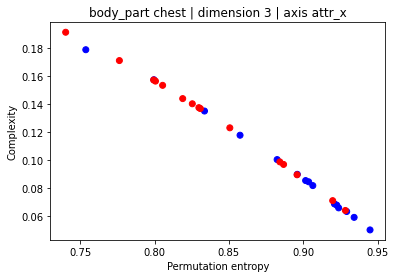

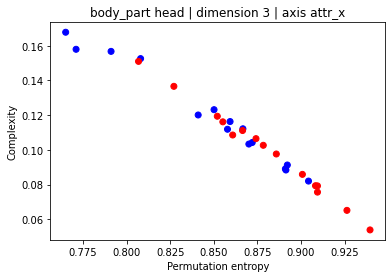

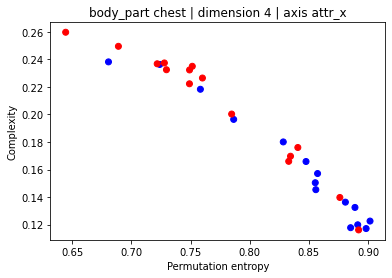

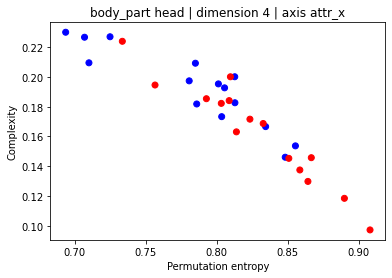

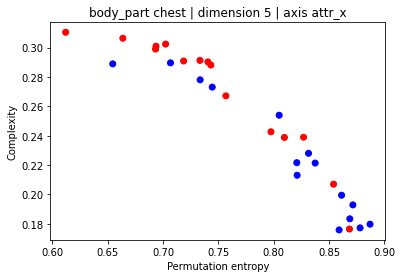

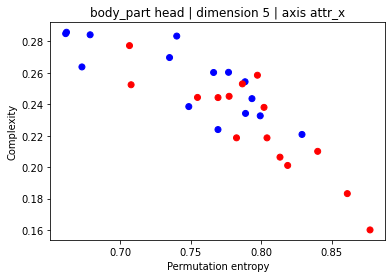

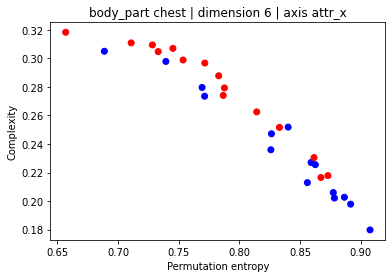

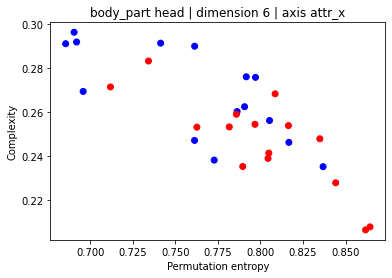

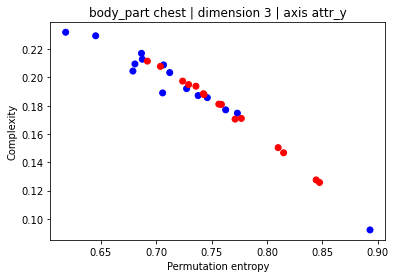

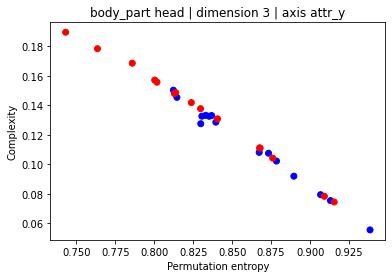

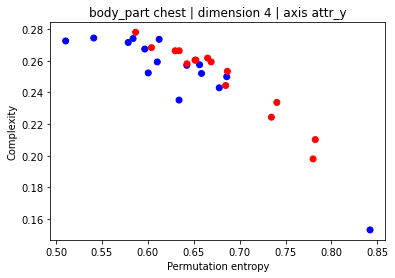

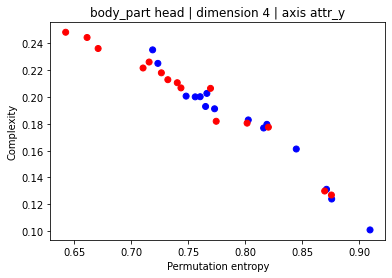

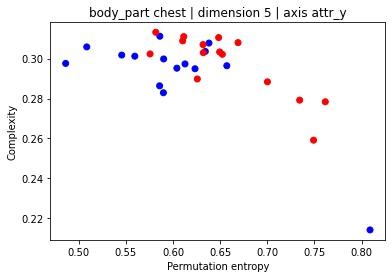

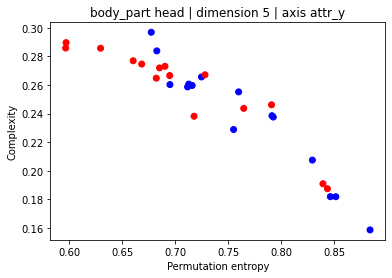

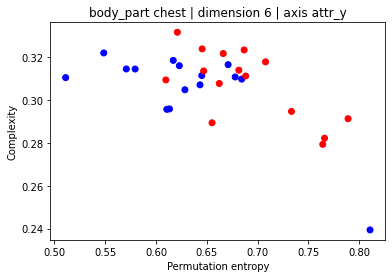

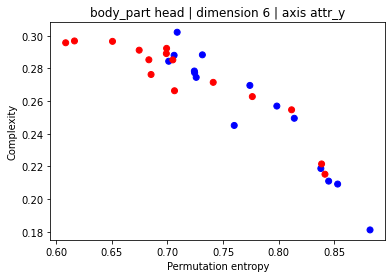

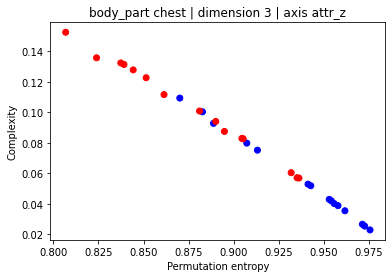

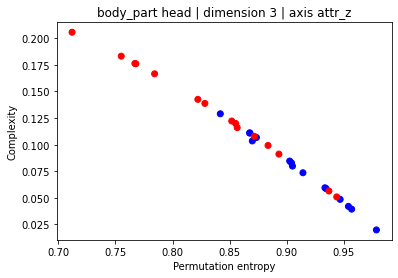

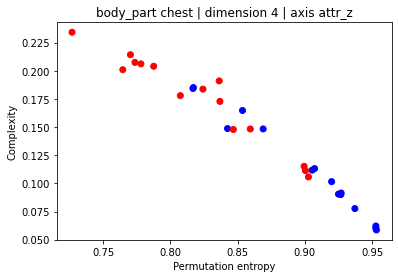

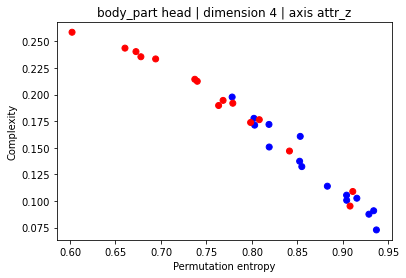

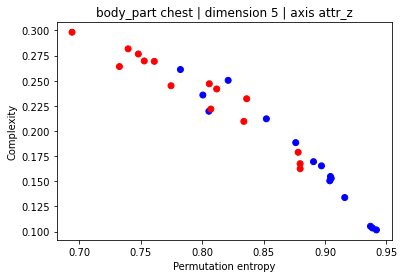

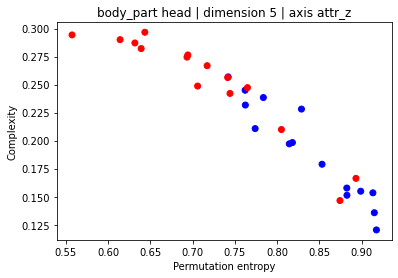

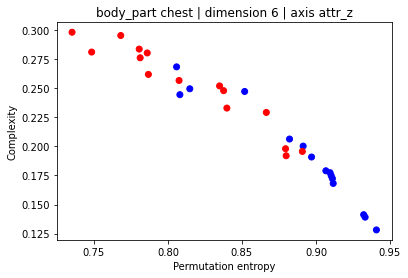

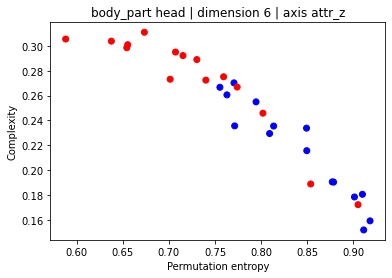

In [23]:
axis = ['attr_x','attr_y','attr_z']
activities = ["walking", "running"]
dimensions = [3, 4, 5, 6]
colors = dict(zip(activities, ["red", "blue"]))  #Mapping the colors with the respective activities 


for x in axis:
  for dim in dimensions:
    for part in results2['Body_part'].unique():
      temp = results2[((results2["Activity"] == "walking") | (results2["Activity"] == "running")) & (results2["Dimension"] == dim ) & 
                    (results2["Accelerometeraxis"] == x) & (results2["Delay"] == 1) &(results2["Signallength"] == 4096) & (results2["Body_part"] == part)]
      plt.scatter(temp['Permutation entropy'],temp["Complexity"], c=temp["Activity"].map(colors))
      plt.xlabel('Permutation entropy')
      plt.ylabel('Complexity')
      plt.title("body_part "+str( part)+ ' | dimension ' + str(dim) +' | axis '+  str(x))
      plt.show()


Generate  scatter plots: permutation entropy vs compleattr_xity and color the points
according to climbing up and climbing down (for signal length =4096, embedded
delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer
directions)

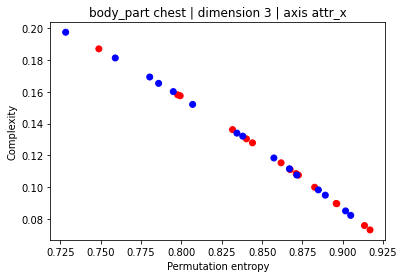

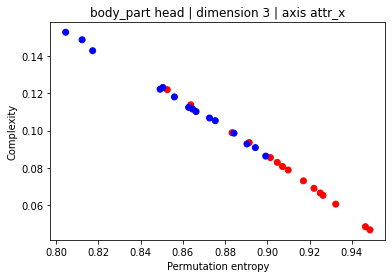

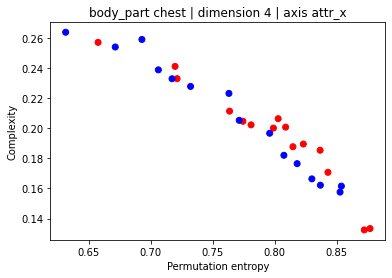

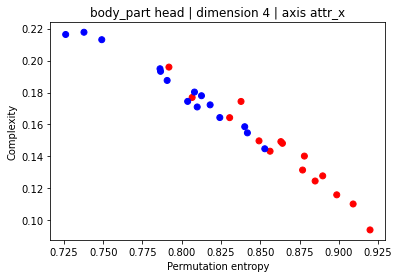

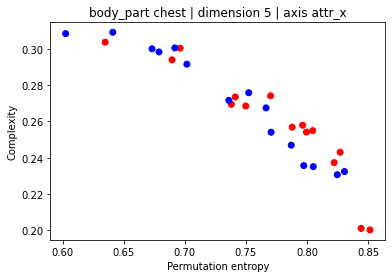

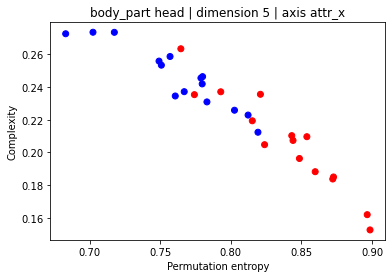

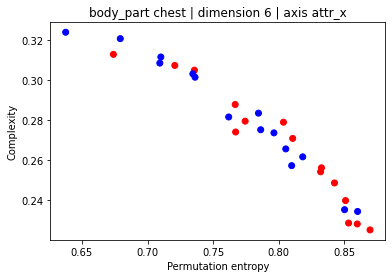

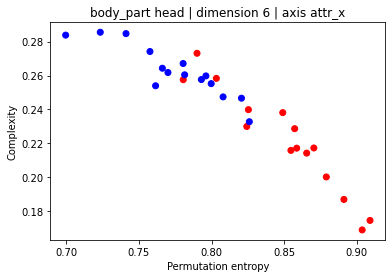

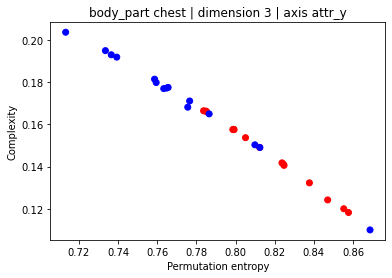

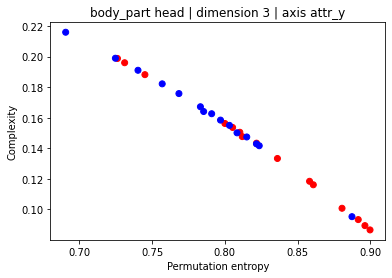

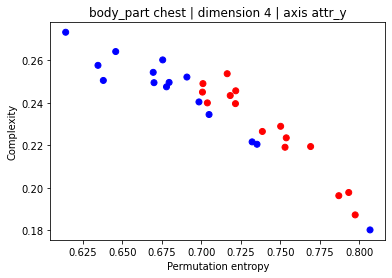

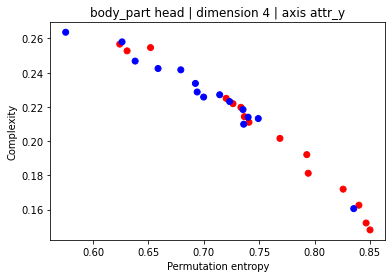

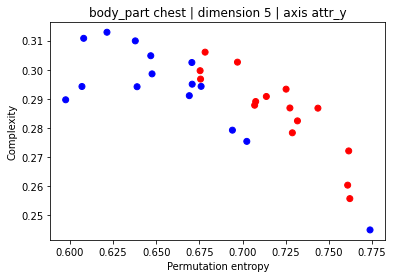

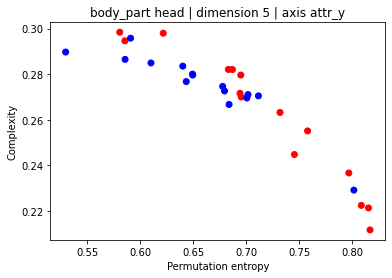

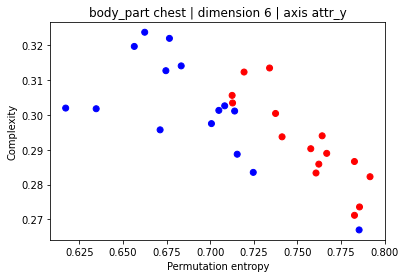

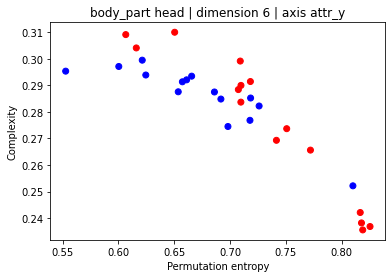

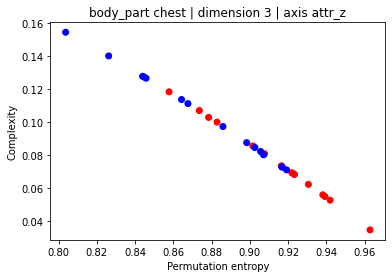

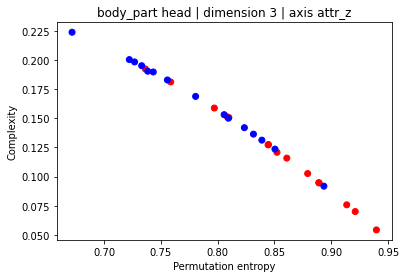

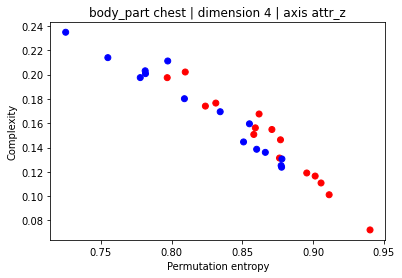

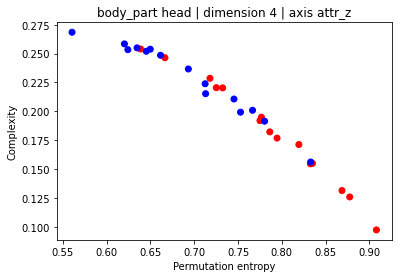

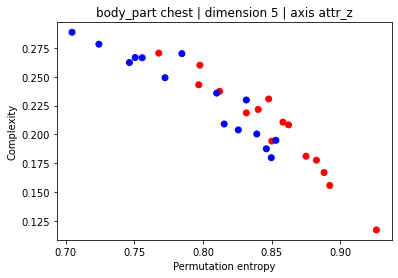

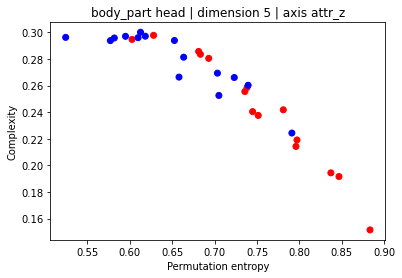

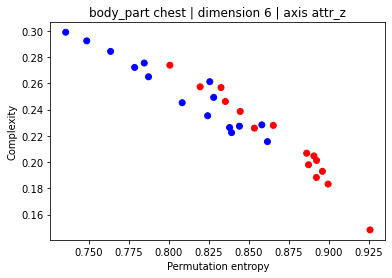

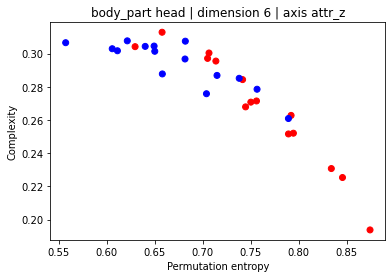

In [24]:
axis = ['attr_x','attr_y','attr_z']
activities = ["climbingdown", "climbingup"]
dimensions = [3, 4, 5, 6]
colors = dict(zip(activities, ["red", "blue"]))


for x in axis:
  for dim in dimensions:
    for part in results2['Body_part'].unique():
      temp = results2[((results2["Activity"] == "climbingdown") | (results2["Activity"] == "climbingup")) & (results2["Dimension"] == dim ) & 
                    (results2["Accelerometeraxis"] == x) & (results2["Delay"] == 1) &(results2["Signallength"] == 4096) & (results2["Body_part"] == part)]
      plt.scatter(temp['Permutation entropy'],temp["Complexity"], c=temp["Activity"].map(colors))
      plt.xlabel('Permutation entropy')
      plt.ylabel('Complexity')
      plt.title("body_part "+str( part)+ ' | dimension ' + str(dim) +' | axis '+  str(x))
      plt.show()
